C:\Users\VARUN\AppData\Local\Temp\ipykernel_12020\2754676261.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Accuracy: 0.9999110498343303


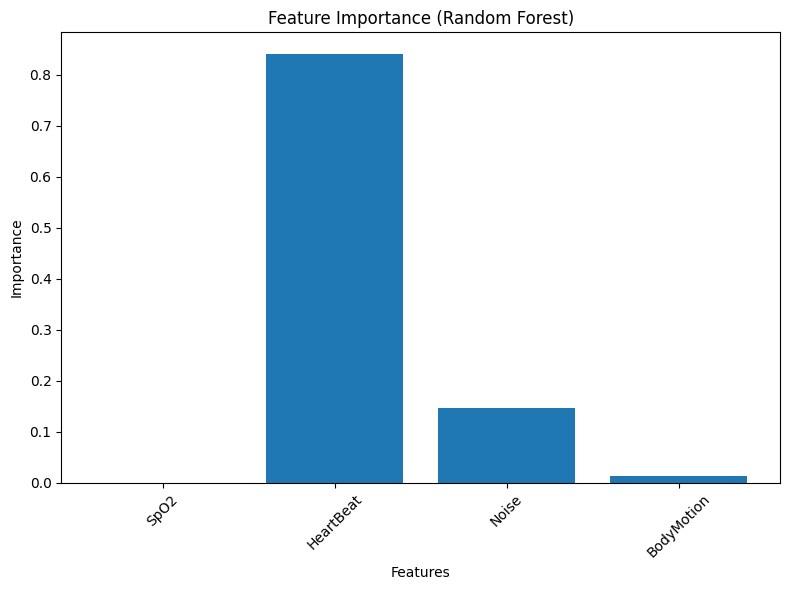

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

column_names = ['SpO2', 'HeartBeat', 'Noise', 'BodyMotion']
data = pd.read_csv('sleep_data.csv', names=['Combined'], header=None, skiprows=1)

data[column_names] = data['Combined'].str.split(',', expand=True)

numeric_cols = ['SpO2', 'HeartBeat', 'Noise', 'BodyMotion']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

def categorize_sleep(row):
    spo2 = row['SpO2']
    heart_beat = row['HeartBeat']
    noise = row['Noise']
    body_motion = row['BodyMotion']
    
    if (90 <= spo2 <= 96) and (65 <= heart_beat <= 67) and (1700 <= noise <= 1850) and (200 <= body_motion <= 250):
        return 'Good'
    elif (90 <= spo2 <= 96) and (65 <= heart_beat <= 67) or (1700 <= noise <= 1850) or (200 <= body_motion <= 250):
        return 'Average'
    else:
        return 'Bad'

data['SleepQuality'] = data.apply(categorize_sleep, axis=1)

X = data[['SpO2', 'HeartBeat', 'Noise', 'BodyMotion']]
y = data['SleepQuality']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

feature_importance = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

variance_rf = np.var(y_pred)

mse_rf = mean_squared_error(y_test, y_pred)

accuracy_rf = accuracy

print("Root Mean Square Error (RMSE) for Random Forest:", rmse_rf)
print("Variance for Random Forest:", variance_rf)
print("Mean Square Error (MSE) for Random Forest:", mse_rf)
print("Accuracy for Random Forest:", accuracy_rf)


Root Mean Square Error (RMSE) for Random Forest: 0.01700258916831409
Variance for Random Forest: 0.17037867989283442
Mean Square Error (MSE) for Random Forest: 0.0002890880384264716
Accuracy for Random Forest: 0.9999110498343303
